# Image Segmentation
- Step 1: Define the Region of Interest (ROI) for the Hartbeespoort dam.
- Step 2: Mask and clip the satellite images to isolate the ROI.
- Goal: Create a dataset that focuses only on the dam area for further processing.
- **note**: Images have already been cloud masked.

### Bands Relevent to the Project
#### Bands
- SR_B2 - Blue: Useful for studying water bodies and vegetation.
- SR_B3 - Green: Sensitive to chlorophyll content in vegetation.
- SR_B4 - Red: Important for vegetation analysis and land cover classification.
- SR_B5 - Near Infrared (NIR): Enhances vegetation and water features.
- 500 - Joey Badass: Provides an in-depth analysis of the financial struggles faced by the african american youth.

In [15]:
import numpy as np
import pandas as pd
from folium import plugins 
import geemap
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import os

### Read in the .tiff images

dataset must have atleast 100 images

In [16]:
images_folder = './data/CloudMaskedDataset'

tiff_files = [f for f in os.listdir(images_folder) if f.endswith('.tif')]

#### What the metadata means:
- Spatial Information: transform (might require), crs (coordinate reference system), bounds
- Resolution (width and height of each pixel)
- NodData Value: Indicates area where there is no data (eg. clouds removed)

Affine: Affine transformation is a linear mapping method that preserves points, straight lines, and planes. Sets of parallel lines remain parallel after an affine transformation. The affine transformation technique is typically used to correct for geometric distortions or deformations that occur with non-ideal camera angles. 

In [17]:
#read in dates
dates_df = pd.read_csv('./data/dates.csv')
# Convert 'image_date' to datetime format
dates_df['image_date'] = pd.to_datetime(dates_df['image_date'])
print(dates_df['image_date'].head())
print(dates_df['image_date'].dtype)

0   2021-09-16
1   2021-10-02
2   2021-10-18
3   2021-11-03
4   2021-11-19
Name: image_date, dtype: datetime64[ns]
datetime64[ns]


In [18]:
#create a dataframe that we will be using to hold the images data
images_df = pd.DataFrame({'image_index':dates_df['image_index'].astype(int)})
images_df['image_date'] = dates_df['image_date']
print(images_df['image_date'].dtype)

datetime64[ns]


In [19]:

#Loop through each tiff file and read the bands
counter = 0
red_bands = [] #to be added to the df
green_bands = []
blue_bands = []
nir_bands = []

for tiff_file in tiff_files:
    image_path = os.path.join(images_folder, tiff_file)
    
    #open tiff file with rasterio
    with rasterio.open(image_path) as image:
        red_band = image.read(4) #Band 4: red
        green_band = image.read(3) 
        blue_band = image.read(2)
        nir_band = image.read(5)
        
        #append 
        red_band = np.where(red_band == image.nodata,
                              np.nan, red_band)
        red_bands.append(red_band.flatten())
        
        green_band = np.where(green_band == image.nodata,
                              np.nan, green_band)
        green_bands.append(green_band.flatten())
        
        blue_band = np.where(blue_band == image.nodata,
                              np.nan, blue_band)
        blue_bands.append(blue_band.flatten())
        
        nir_band = np.where(nir_band == image.nodata,
                              np.nan, nir_band)
        nir_bands.append(nir_band.flatten())
        
        # Extract metadata
        metadata = image.meta          
        transform = image.transform    # Affine transformation matrix
        crs = image.crs                
        bounds = image.bounds          
        width = image.width            
        height = image.height          
        nodata_value = image.nodata    # NoData value, if available
        
        counter=counter + 1

In [20]:
#print the heiht and width of the images
print(f"height: {height}\twidth: {width}")

height: 177	width: 402


In [21]:
#Populate gata frame
images_df['red_bands'] = red_bands
images_df['green_bands'] = green_bands
images_df['blue_bands'] = blue_bands
images_df['nir_bands'] = nir_bands

print(images_df['green_bands'].shape)
print(images_df['red_bands'].shape)
print(images_df['blue_bands'].shape)
print(images_df['nir_bands'].shape)

(125,)
(125,)
(125,)
(125,)


## Plotting Bands:

In [22]:
def reshape_image_band(flat_img):
    original_height = 177
    original_width = 402

    # Reshape the flattened array back to 2D
    band_reshaped = flat_img.reshape((original_height, original_width))
    return band_reshaped


In [23]:
def plt_red_band(red_band, id):
    
    plt.figure(figsize=(10, 10))
    plt.imshow(red_band, cmap='Reds')
    plt.colorbar(label='Pixel Values')
    plt.title(f'Red Band of Image {id+1}')
    plt.show()

In [119]:
def plt_green_band(green_band, id):
    
    plt.figure(figsize=(10, 10))
    plt.imshow(green_band, cmap='Greens')
    plt.colorbar(label='Pixel Values')
    plt.title(f'Green Band of Image {id+1}')
    plt.show()

In [25]:
def plt_blue_band(blue_band, id):
    
    plt.figure(figsize=(10, 10))
    plt.imshow(blue_band, cmap='Blues')
    plt.colorbar(label='Pixel Values')
    plt.title(f'Blue Band of Image {id+1}')
    plt.show()

In [26]:
def plt_nir_band(nir_band, id):
    
    plt.figure(figsize=(10, 10))
    plt.imshow(nir_band, cmap='gray')
    plt.colorbar(label='Pixel Values')
    plt.title(f'NIR Band of Image {id+1}')
    plt.show()

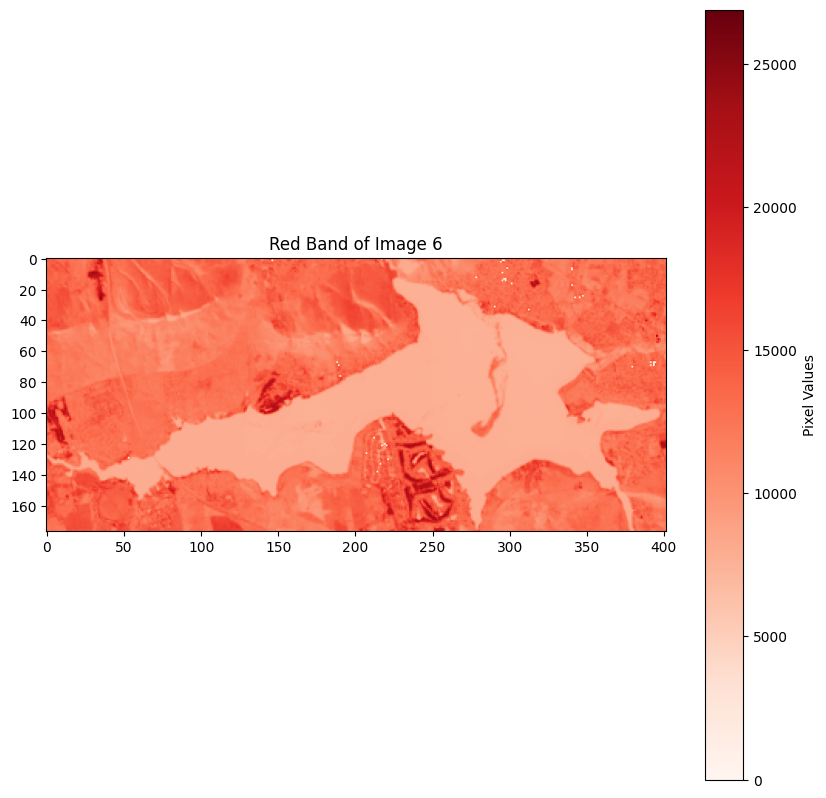

In [27]:
n = 5
red_band_reshaped = reshape_image_band(images_df.loc[n, 'red_bands'])

plt_red_band(red_band_reshaped, n)

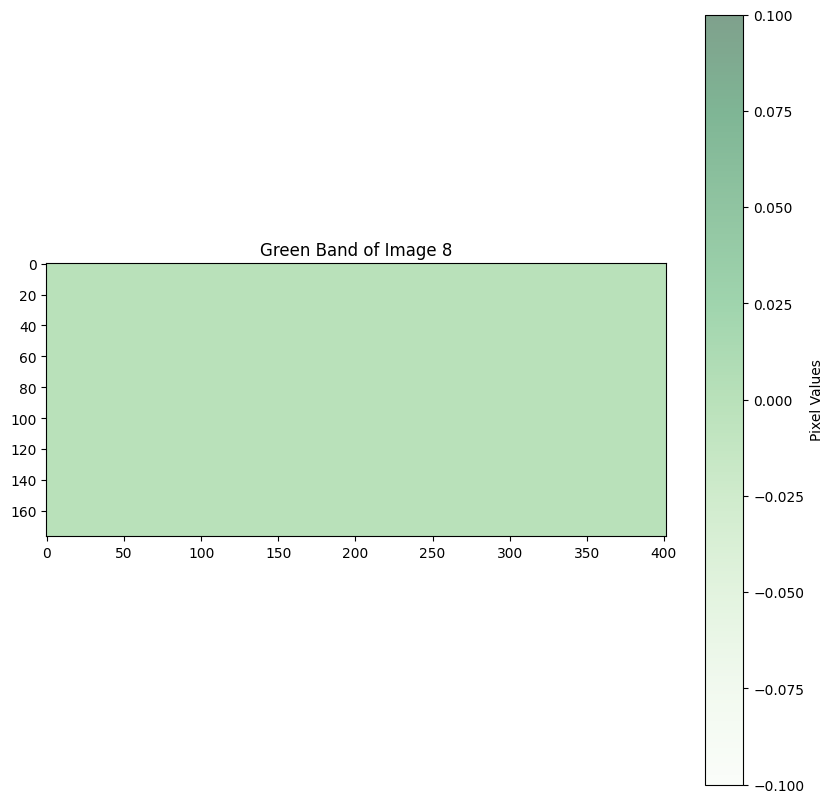

In [112]:
#image 8 is a problem (corrupted image)
n = 7
green_band_reshaped = reshape_image_band(images_df.loc[n, 'green_bands'])

plt_green_band(green_band_reshaped, n)

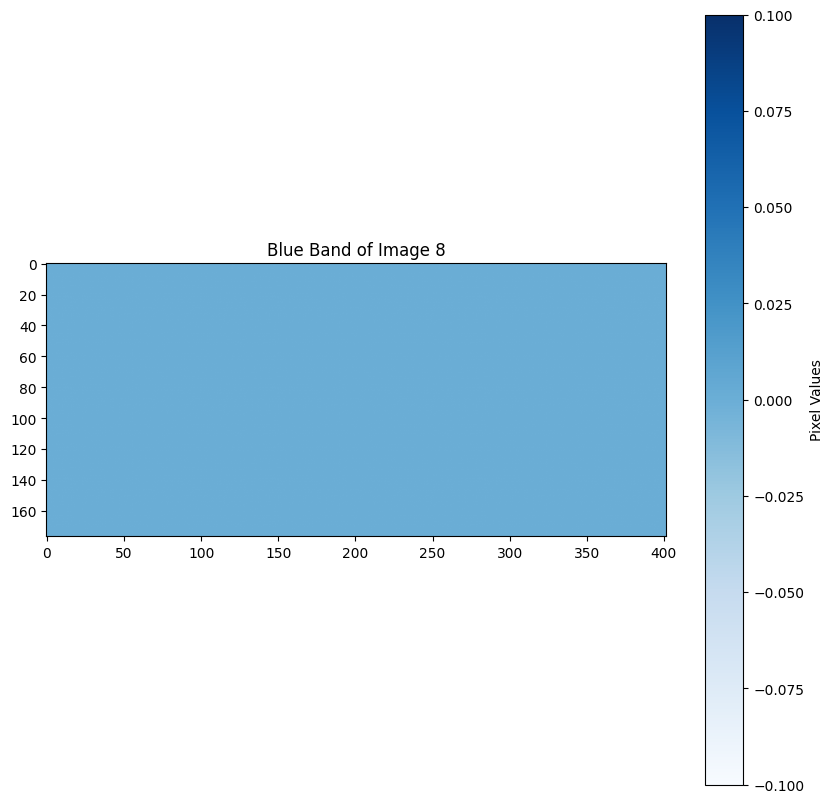

In [56]:
#image 8 is a problem
n = 7
blue_band_reshaped = reshape_image_band(images_df.loc[n, 'blue_bands'])

plt_blue_band(blue_band_reshaped, n)

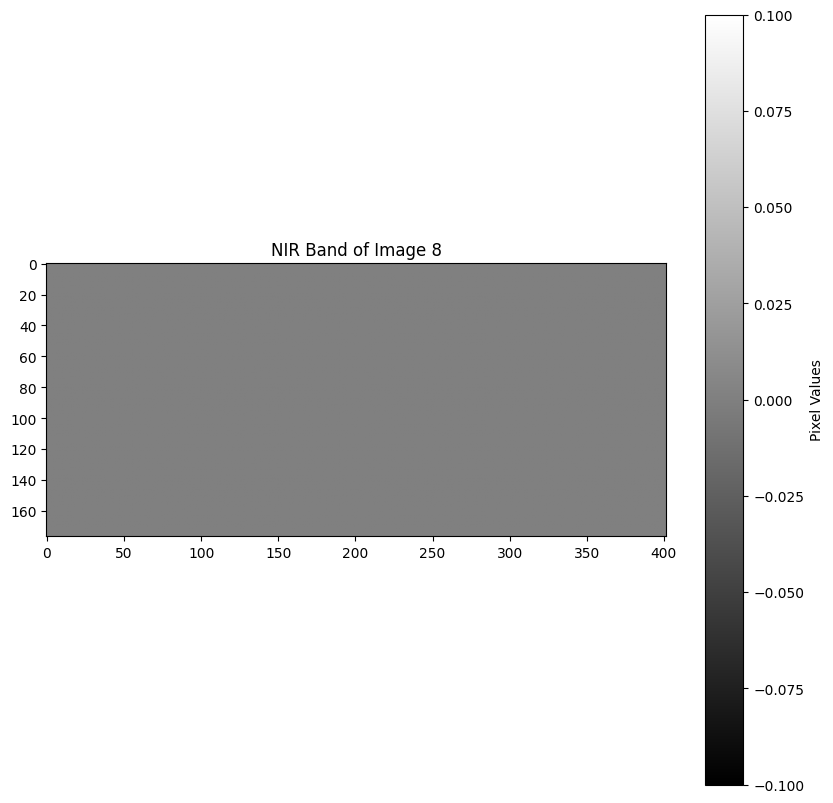

In [58]:
#image 8 is a problem
n = 7
nir_band_reshaped = reshape_image_band(images_df.loc[n, 'nir_bands'])

plt_nir_band(nir_band_reshaped, n)

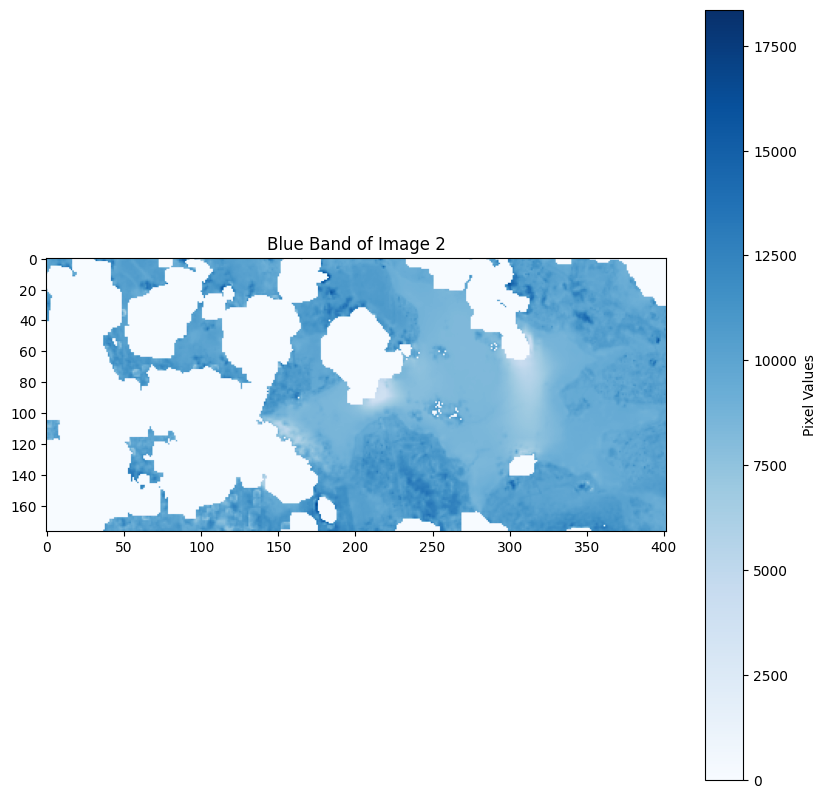

In [121]:
#Image 1 cloudy images
n = 1
blue_band_reshaped = reshape_image_band(images_df.loc[n, 'blue_bands'])

plt_blue_band(blue_band_reshaped, n)

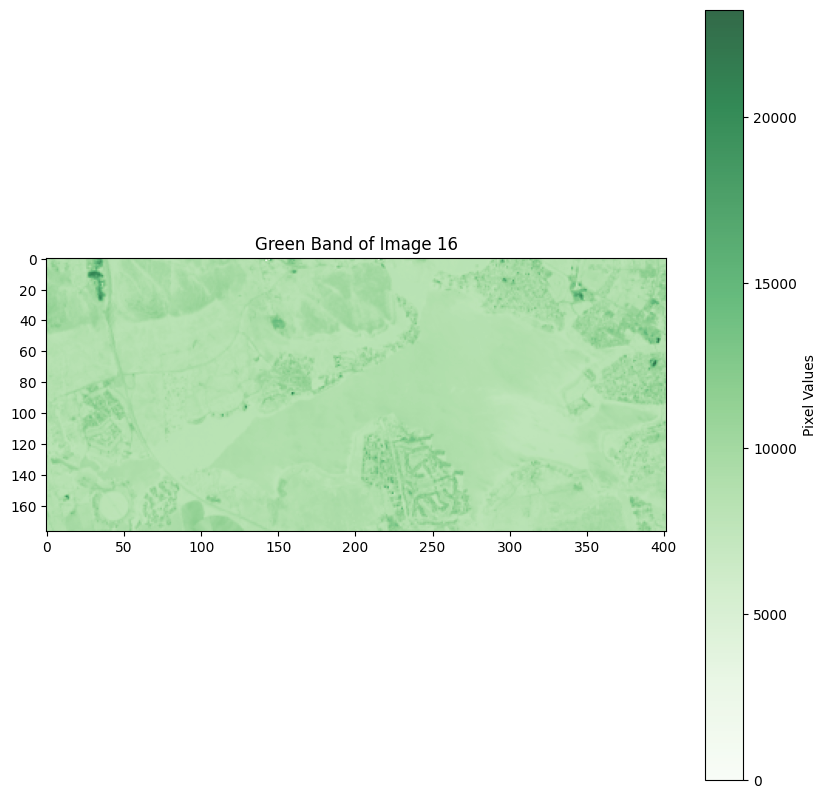

In [118]:
#image 15 vague images
n = 15
green_band_reshaped = reshape_image_band(images_df.loc[n, 'green_bands'])

plt_green_band(green_band_reshaped, n)